# NumPy Colab Practice

* Adapted from material created by Alex Chabot-Leclerc for use in Google Colab  
* Video Tutorial: https://www.youtube.com/watch?v=ZB7BZMhfPgk
* Tutorial git repo: https://github.com/enthought/Numpy-Tutorial-SciPyConf-2019

## Setup

Setup Drive for file storage/retrieval, imports

In [1]:
from google.colab import drive
import os
import numpy as np

drive.mount('/content/gdrive')
root_path = '/content/gdrive/My Drive/shimsan/numpy_practice'  #change dir to your project folder

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
! ls
print(root_path)
os.chdir(root_path)
! pwd

gdrive	sample_data
/content/gdrive/My Drive/shimsan/numpy_practice
/content/gdrive/My Drive/shimsan/numpy_practice


In [11]:
## Getting data for Enthought Numpy Tutorial Repo. (Run only once)
#! git clone https://github.com/enthought/Numpy-Tutorial-SciPyConf-2019
#! pwd
#! ls

Cloning into 'Numpy-Tutorial-SciPyConf-2019'...
remote: Enumerating objects: 38, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 38 (delta 7), reused 33 (delta 6), pack-reused 0
Unpacking objects: 100% (38/38), done.
/content/gdrive/My Drive/shimsan/numpy_practice
Numpy-Tutorial-SciPyConf-2019


In [0]:
tut_path = root_path + "/Numpy-Tutorial-SciPyConf-2019"

## NumPy Practice

In [0]:
import numpy as np
#print(f"NumPy Version: {np.__version__}")
#print("NumPy Configuration:")
#np.show_config()


In [0]:
a = [1, 2, 3, 4, 5]
b = [10, 11, 12, 13, 14]
a+b

[1, 2, 3, 4, 5, 10, 11, 12, 13, 14]

Using + returns concatenated list instead of addition which was what was intended. Other option is for-loops (Ew!). So, enter NumPy

In [0]:
a1 = np.array(a)
a1

array([1, 2, 3, 4, 5])

In [0]:
a1.dtype

dtype('int64')

In [0]:
a1.ndim

1

In [0]:
a1.shape

(5,)

In [0]:
f = np.array([1.2, 2.3, 3.4, 4.5, 5.6])

In [0]:
a1 + f

array([ 2.2,  4.3,  6.4,  8.5, 10.6])

In [0]:
a / f

array([0.83333333, 0.86956522, 0.88235294, 0.88888889, 0.89285714])

In [0]:
a * f

array([ 1.2,  4.6, 10.2, 18. , 28. ])

In [0]:
a1 ** f

array([1.00000000e+00, 4.92457765e+00, 4.18998305e+01, 5.12000000e+02,
       8.20789939e+03])

In [0]:
a1 * 10

array([10, 20, 30, 40, 50])

In [0]:
# Universal Functions - ufuncs
np.sin(a1)

array([ 0.84147098,  0.90929743,  0.14112001, -0.7568025 , -0.95892427])

## Slicing and Indexing

In [0]:
arr = np.arange(25).reshape(5,5)
print(arr)

Get the slices below

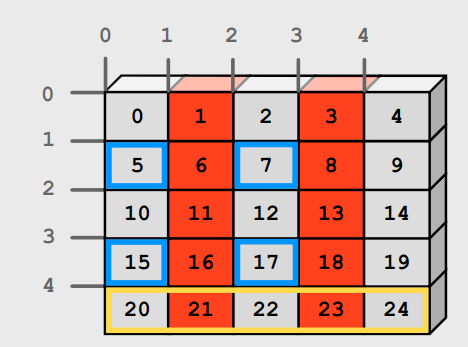

In [0]:
yellow = arr[-1]
print(yellow)

In [0]:
red = arr[:, 1::2]
print(red)

In [0]:
blue = arr[1::2, :-2:2]
print(blue)

In [0]:
a = np.array([1, 2, 3, 4, 5])
b = a[:2] #This is shallow copy, so WILL change a if b changes. For deepcopy use --> b = a.copy()
b

In [0]:
b[0] = -1
print(b)
print(a)

## Filter Image Exercise

### Exercise Starting Code

In [0]:
"""
Filter Image
------------

Read in the "dc_metro" image and use an averaging filter
to "smooth" the image.  Use a "5 point stencil" where
you average the current pixel with its neighboring pixels::

              0 0 0 0 0 0 0
              0 0 0 x 0 0 0
              0 0 x x x 0 0
              0 0 0 x 0 0 0
              0 0 0 0 0 0 0

Plot the image, the smoothed image, and the difference between the
two.

Bonus
~~~~~

Re-filter the image by passing the result image through the filter again. Do
this 50 times and plot the resulting image.

See :ref:`filter-image-solution`.
"""

import matplotlib.pyplot as plt

img_path = tut_path + '/exercises/filter_image/dc_metro.png'
img = plt.imread(img_path)

plt.imshow(img, cmap=plt.cm.hot)
plt.show()

### Exercise Solution

In [45]:
## Getting the slices figured out using an example array
x = np.arange(36).reshape(6,6)
print(x)


[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]
 [24 25 26 27 28 29]
 [30 31 32 33 34 35]]


In [0]:
top = x[:-2, 1:-1] ## Get rid of 2 bottom rows, and one column to the left, and one column to the right
print(top)

bottom = x[2:, 1:-1]
print(bottom)

left = x[1:-1, :-2] ## get rid of top and bottom rows, and two at the right
print(left)

right = x[1:-1, 2:]
print(right)

center = x[1:-1, 1:-1]
print(center)

Completed Solution

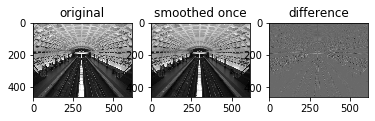

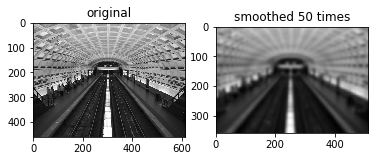

In [53]:
import numpy as np
import matplotlib.pyplot as plt

def smooth(img):
    avg_img =(    img[1:-1 ,1:-1]  # center
                + img[ :-2 ,1:-1]  # top
                + img[2:   ,1:-1]  # bottom
                + img[1:-1 , :-2]  # left
                + img[1:-1 ,2:  ]  # right
                ) / 5.0
    return avg_img


def smooth_loop(img):
    smoothed = np.zeros((img.shape[0]-2, img.shape[1]-2))
    for r in range(0, img.shape[0]-2):
        for c in range(0, img.shape[1]-2):
            smoothed[r, c] = (  img[r+1, c+1]  # center
                              + img[r  , c+1]  # top
                              + img[r+2, c+1]  # bottom
                              + img[r+1, c  ]  # left
                              + img[r+1, c+2]  # right
                             ) / 5.0
    return smoothed

img_path = tut_path + '/exercises/filter_image/dc_metro.png'
img = plt.imread(img_path)
avg_img = smooth(img)

plt.figure()
# Set colormap so that images are plotted in gray scale.
plt.gray()
# Plot the original image first
plt.subplot(1,3,1)
plt.imshow(img)
plt.title('original')

# Now the filtered image.
plt.subplot(1,3,2)
plt.imshow(avg_img)
plt.title('smoothed once')

# And finally the difference between the two.
plt.subplot(1,3,3)
plt.imshow(img[1:-1,1:-1] - avg_img)
plt.title('difference')


# Bonus: Re-filter the image by passing the result image
#        through the filter again.  Do this 50 times and plot
#        the resulting image.

for num in range(50):
    avg_img = smooth(avg_img)

# Plot the original image first
plt.figure()
plt.subplot(1,2,1)
plt.imshow(img)
plt.title('original')

# Now the filtered image.
plt.subplot(1,2,2)
plt.imshow(avg_img)
plt.title('smoothed 50 times')

assert np.allclose(smooth(img), smooth_loop(img))

plt.show()

In [54]:
%timeit(smooth(img))

1000 loops, best of 3: 711 µs per loop


In [55]:
%timeit(smooth_loop(img))

1 loop, best of 3: 1.01 s per loop


## Fancy Indexing

In [11]:
fa = np.arange(0, 80, 10)
print(fa)
indices = [1, 2, -3]
y = fa[indices]
print(y)

[ 0 10 20 30 40 50 60 70]
[10 20 50]


In [7]:
fa[indices] = 99
print(fa)

[ 0 99 99 30 40 99 60 70]


In [12]:
mask = np.array([0, 1, 0, 1, 1, 0, 0, 1], dtype=bool)
y = fa[mask]
print(y)


[10 30 40 70]


In [15]:
a = np.array([-1, -3, 1, 4, -6, 9, 3])
neg = a<0
print(neg)
b = a[neg]
print(a)
print(f"after mask:\n{b}")
a[neg] = 0
print(f"After ReLU:{a}")

[ True  True False False  True False False]
[-1 -3  1  4 -6  9  3]
after mask:
[-1 -3 -6]
After ReLU:[0 0 1 4 0 9 3]


Fancy Indexing in 2-D

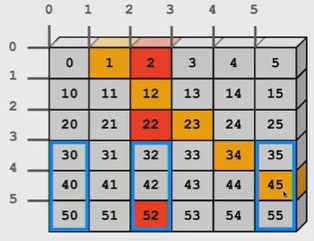

In [31]:
a = np.arange(36).reshape(6,6)
for i in range(1,6):
  a[i:i+1] = a[i-1:i] + 10

print(a)

[[ 0  1  2  3  4  5]
 [10 11 12 13 14 15]
 [20 21 22 23 24 25]
 [30 31 32 33 34 35]
 [40 41 42 43 44 45]
 [50 51 52 53 54 55]]


In [38]:
yellow = a[[0,1,2,3,4],[1,2,3,4,5]]
print(f"Yellow:\n{yellow}\n")

redmask = np.array([1, 0, 1, 0, 0, 1], dtype=bool)
red = a[redmask, 2]
print(f"Red:\n{red}\n")

blue = a[3:, [0, 2, 5]]
print(f"Blue:\n{blue}\n")

Yellow:
[ 1 12 23 34 45]

Red:
[ 2 22 52]

Blue:
[[30 32 35]
 [40 42 45]
 [50 52 55]]



In [26]:
a = np.arange(25).reshape(5,5)
print(a)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]


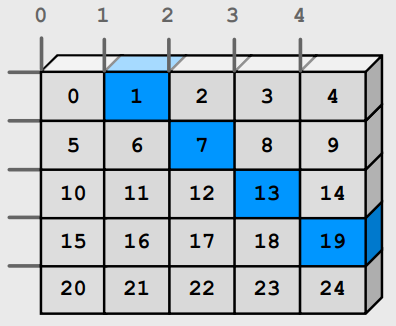

In [28]:
blue = a[[0, 1, 2, 3],
         [1, 2, 3, 4]]

print(blue)

[ 1  7 13 19]


In [30]:
div3 = a % 3 == 0
print(a[div3])

[ 0  3  6  9 12 15 18 21 24]


## Array Broadcasting

In [7]:
# Rule 1
a = np.ones((3,5))
b = np.ones((5,))

print(f"a:\n{a}\n")
print(f"b:\n{b}\n")

b.reshape(1,5)

print("b new axis:")
print(b[np.newaxis, :])

print(f"\nb:\n{b}\n")

a:
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]

b:
[1. 1. 1. 1. 1.]

b new axis:
[[1. 1. 1. 1. 1.]]

b:
[1. 1. 1. 1. 1.]



In [8]:
# Rule 2:
c = a + b
tmp_b = b.reshape(1,5)
tmp_b_repeat = tmp_b.repeat(3, axis=0)
c = a + tmp_b_repeat

print(f"c:\n{c}\n")
print(f"tmp_b:\n{tmp_b}\n")
print(f"tmp_b_repeat:\n{tmp_b_repeat}\n")
print(f"c:\n{c}\n")

c:
[[2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2.]]

tmp_b:
[[1. 1. 1. 1. 1.]]

tmp_b_repeat:
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]

c:
[[2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2.]]



In [10]:
# Broadcasting in action
a = np.array([0, 10, 20, 30])
b = np.array([0, 1, 2])
y = a[:, np.newaxis] + b

print(f"a:\n{a}\n")
print(f"b:\n{b}\n")
print(f"y:\n{y}\n")

a:
[ 0 10 20 30]

b:
[0 1 2]

y:
[[ 0  1  2]
 [10 11 12]
 [20 21 22]
 [30 31 32]]



Array Calculations

In [0]:
a = np.array([1,2,3],[4,5,6])
print(a.sum())

In [0]:
print(a.sum(axis=0))

In [0]:
print(a.sum(axis=1))

In [14]:
a = np.array([[2,3], [0,1]])
print("a:")
print(f"{a}\n")
np.min(a)

a:
[[2 3]
 [0 1]]



0

In [12]:
a.min()

0

In [0]:
a.max(axis=0)

In [0]:
np.max(a, axis=1)

In [0]:
a.argmax()

In [0]:
np.argmin(a)

In [0]:
# Unravel to unflatten, to know the exact coords of the argmax in n-d array
np.unravel_index(a.argmax(), a.shape)

In [15]:
# Where
a = np.arange(-2, 2) ** 2
print(f"{a}\n")

mask = a%2==0
print(f"mask is {mask}\n")

print(np.where(mask))

[4 1 0 1]

mask is [ True False  True False]

(array([0, 2]),)


## Exercise: Wind Statistics

Exercise Starting Code

In [0]:
"""
Wind Statistics
----------------

Topics: Using array methods over different axes, fancy indexing.

1. The data in 'wind.data' has the following format::

        61  1  1 15.04 14.96 13.17  9.29 13.96  9.87 13.67 10.25 10.83 12.58 18.50 15.04
        61  1  2 14.71 16.88 10.83  6.50 12.62  7.67 11.50 10.04  9.79  9.67 17.54 13.83
        61  1  3 18.50 16.88 12.33 10.13 11.17  6.17 11.25  8.04  8.50  7.67 12.75 12.71

   The first three columns are year, month and day.  The
   remaining 12 columns are average windspeeds in knots at 12
   locations in Ireland on that day.

   Use the 'loadtxt' function from numpy to read the data into
   an array.

2. Calculate the min, max and mean windspeeds and standard deviation of the
   windspeeds over all the locations and all the times (a single set of numbers
   for the entire dataset).

3. Calculate the min, max and mean windspeeds and standard deviations of the
   windspeeds at each location over all the days (a different set of numbers
   for each location)

4. Calculate the min, max and mean windspeed and standard deviations of the
   windspeeds across all the locations at each day (a different set of numbers
   for each day)

5. Find the location which has the greatest windspeed on each day (an integer
   column number for each day).

6. Find the year, month and day on which the greatest windspeed was recorded.

7. Find the average windspeed in January for each location.

You should be able to perform all of these operations without using a for
loop or other looping construct.

Bonus
~~~~~

1. Calculate the mean windspeed for each month in the dataset.  Treat
   January 1961 and January 1962 as *different* months. (hint: first find a
   way to create an identifier unique for each month. The second step might
   require a for loop.)

2. Calculate the min, max and mean windspeeds and standard deviations of the
   windspeeds across all locations for each week (assume that the first week
   starts on January 1 1961) for the first 52 weeks. This can be done without
   any for loop.

Bonus Bonus
~~~~~~~~~~~

Calculate the mean windspeed for each month without using a for loop.
(Hint: look at `searchsorted` and `add.reduceat`.)

Notes
~~~~~

These data were analyzed in detail in the following article:

   Haslett, J. and Raftery, A. E. (1989). Space-time Modelling with
   Long-memory Dependence: Assessing Ireland's Wind Power Resource
   (with Discussion). Applied Statistics 38, 1-50.


See :ref:`wind-statistics-solution`.
"""

from numpy import loadtxt



In [26]:
# 1. The data in 'wind.data' has the following format::
#
#        61  1  1 15.04 14.96 13.17  9.29 13.96  9.87 13.67 10.25 10.83 12.58 18.50 15.04
#        61  1  2 14.71 16.88 10.83  6.50 12.62  7.67 11.50 10.04  9.79  9.67 17.54 13.83
#        61  1  3 18.50 16.88 12.33 10.13 11.17  6.17 11.25  8.04  8.50  7.67 12.75 12.71
#
#   The first three columns are year, month and day.  The
#   remaining 12 columns are average windspeeds in knots at 12
#   locations in Ireland on that day.

#   Use the 'loadtxt' function from numpy to read the data into
#   an array.

wind_data = loadtxt(tut_path + '/exercises/wind_statistics/wind.data')

data = wind_data[:, 3:]
print(data)

[[15.04 14.96 13.17 ... 12.58 18.5  15.04]
 [14.71 16.88 10.83 ...  9.67 17.54 13.83]
 [18.5  16.88 12.33 ...  7.67 12.75 12.71]
 ...
 [14.   10.29 14.42 ... 16.42 18.88 29.58]
 [18.5  14.04 21.29 ... 12.12 14.67 28.79]
 [20.33 17.41 27.29 ... 11.38 12.08 22.08]]


In [25]:
#2. Calculate the min, max and mean windspeeds and standard deviation of the
#   windspeeds over all the locations and all the times (a single set of numbers
#   for the entire dataset).

print("min:")
print(data.min())

print("\nmax:")
print(data.max())

print("\nmean:")
print(data.mean())

print("\nstd:")
print(data.std())

min:
1.0

max:
61.0

mean:
13.929777777777776

std:
13.39782278977345


In [0]:
# 3.

# Collapse rows, so axis=0, also column 3:

data.mean(axis=0)

In [29]:
# 6.

windy_day = np.where(data == data.max())  # not where(data.max())
print(windy_day)

## Also try with unravel_index

(array([2161]), array([11]))


Exercise Solution

In [0]:
"""
Wind Statistics
----------------

Topics: Using array methods over different axes, fancy indexing.

1. The data in 'wind.data' has the following format::

        61  1  1 15.04 14.96 13.17  9.29 13.96  9.87 13.67 10.25 10.83 12.58 18.50 15.04
        61  1  2 14.71 16.88 10.83  6.50 12.62  7.67 11.50 10.04  9.79  9.67 17.54 13.83
        61  1  3 18.50 16.88 12.33 10.13 11.17  6.17 11.25  8.04  8.50  7.67 12.75 12.71

   The first three columns are year, month and day.  The
   remaining 12 columns are average windspeeds in knots at 12
   locations in Ireland on that day.

   Use the 'loadtxt' function from numpy to read the data into
   an array.

2. Calculate the min, max and mean windspeeds and standard deviation of the
   windspeeds over all the locations and all the times (a single set of numbers
   for the entire dataset).

3. Calculate the min, max and mean windspeeds and standard deviations of the
   windspeeds at each location over all the days (a different set of numbers
   for each location)

4. Calculate the min, max and mean windspeed and standard deviations of the
   windspeeds across all the locations at each day (a different set of numbers
   for each day)

5. Find the location which has the greatest windspeed on each day (an integer
   column number for each day).

6. Find the year, month and day on which the greatest windspeed was recorded.

7. Find the average windspeed in January for each location.

You should be able to perform all of these operations without using a for
loop or other looping construct.

Bonus
~~~~~

1. Calculate the mean windspeed for each month in the dataset.  Treat
   January 1961 and January 1962 as *different* months.

2. Calculate the min, max and mean windspeeds and standard deviations of the
   windspeeds across all locations for each week (assume that the first week
   starts on January 1 1961) for the first 52 weeks.

Bonus Bonus
~~~~~~~~~~~

Calculate the mean windspeed for each month without using a for loop.
(Hint: look at `searchsorted` and `add.reduceat`.)

Notes
~~~~~

These data were analyzed in detail in the following article:

   Haslett, J. and Raftery, A. E. (1989). Space-time Modelling with
   Long-memory Dependence: Assessing Ireland's Wind Power Resource
   (with Discussion). Applied Statistics 38, 1-50.

"""
from __future__ import print_function
from numpy import (loadtxt, arange, searchsorted, add, zeros, unravel_index,
                   where)

wind_data = loadtxt('tut_path' + '/exercises/wind_statistics/wind.data')

data = wind_data[:, 3:]

print('2. Statistics over all values')
print('  min:', data.min())
print('  max:', data.max())
print('  mean:', data.mean())
print('  standard deviation:', data.std())
print()

print('3. Statistics over all days at each location')
print('  min:', data.min(axis=0))
print('  max:', data.max(axis=0))
print('  mean:', data.mean(axis=0))
print('  standard deviation:', data.std(axis=0))
print()

print('4. Statistics over all locations for each day')
print('  min:', data.min(axis=1))
print('  max:', data.max(axis=1))
print('  mean:', data.mean(axis=1))
print('  standard deviation:', data.std(axis=1))
print()

print('5. Location of daily maximum')
print('  daily max location:', data.argmax(axis=1))
print()

daily_max = data.max(axis=1)
max_row = daily_max.argmax()
# Note: Another way to do this would be to use the unravel_index function
# which takes a linear index and convert it to a location given the shape
# of the array:
max_row, max_col = unravel_index(data.argmax(), data.shape)
# Or you could use "where", which identifies *all* the places where the max
# occurs, rather than just the first. Note that "where" returns two arrays in
# this case, instead of two integers.
max_row, max_col = where(data == data.max())


print('6. Day of maximum reading')
print('  Year:', int(wind_data[max_row, 0]))
print('  Month:', int(wind_data[max_row, 1]))
print('  Day:', int(wind_data[max_row, 2]))
print()

january_indices = wind_data[:, 1] == 1
january_data = data[january_indices]

print('7. Statistics for January')
print('  mean:', january_data.mean(axis=0))
print()

# Bonus

# compute the month number for each day in the dataset
months = (wind_data[:, 0] - 61) * 12 + wind_data[:, 1] - 1

# we're going to use the month values as indices, so we need
# them to be integers
months = months.astype(int)

# get set of unique months
month_values = set(months)

# initialize an array to hold the result
monthly_means = zeros(len(month_values))

for month in month_values:
    # find the rows that correspond to the current month
    day_indices = (months == month)

    # extract the data for the current month using fancy indexing
    month_data = data[day_indices]

    # find the mean
    monthly_means[month] = month_data.mean()

    # Note: experts might do this all-in one
    # monthly_means[month] = data[months==month].mean()

# In fact the whole for loop could reduce to the following one-liner
# monthly_means = array([data[months==month].mean() for month in month_values])


print("Bonus 1.")
print("  mean:", monthly_means)
print()

# Bonus 2.
# Extract the data for the first 52 weeks. Then reshape the array to put
# on the same line 7 days worth of data for all locations. Let Numpy
# figure out the number of lines needed to do so
weekly_data = data[:52 * 7].reshape(-1, 7 * 12)

print('Bonus 2. Weekly statistics over all locations')
print('  min:', weekly_data.min(axis=1))
print('  max:', weekly_data.max(axis=1))
print('  mean:', weekly_data.mean(axis=1))
print('  standard deviation:', weekly_data.std(axis=1))
print()

# Bonus Bonus : this is really tricky...

# compute the month number for each day in the dataset
months = (wind_data[:, 0] - 61) * 12 + wind_data[:, 1] - 1

# find the indices for the start of each month
# this is a useful trick - we use range from 0 to the
# number of months + 1 and searchsorted to find the insertion
# points for each.
month_indices = searchsorted(months, arange(months[-1] + 2))

# now use add.reduceat to get the sum at each location
monthly_loc_totals = add.reduceat(data, month_indices[:-1])

# now use add to find the sum across all locations for each month
monthly_totals = monthly_loc_totals.sum(axis=1)

# now find total number of measurements for each month
month_days = month_indices[1:] - month_indices[:-1]
measurement_count = month_days * 12

# compute the mean
monthly_means = monthly_totals / measurement_count

print("Bonus Bonus")
print("  mean:", monthly_means)

# Notes: this method relies on the fact that the months are contiguous in the
# data set - the method used in the bonus section works for non-contiguous
# days.


## NumPy Operations (Material outside of the Enthought Tutorial)

In [0]:
# Concatenation
array_1 = np.array([[1,2,3],[0,0,0]])
array_2 = np.array([[0,0,0],[7,8,9]])

print(array_1)
print()
print(array_2)
print()
print("Axis 0 Concat:")
print (np.concatenate((array_1, array_2), axis = 0)) 
print()
print("Axis 1 Concat")
print (np.concatenate((array_1, array_2), axis = 1)) 

[[1 2 3]
 [0 0 0]]

[[0 0 0]
 [7 8 9]]

Axis 0 Concat:
[[1 2 3]
 [0 0 0]
 [0 0 0]
 [7 8 9]]

Axis 1 Concat
[[1 2 3 0 0 0]
 [0 0 0 7 8 9]]
